### Final Project Submission

Please fill out:
* Student name: Cristina Townsend
* Student pace: part time 
* Scheduled project review date/time: Wednesday 08/12/2020 at 16:00
* Instructor name: James Irving
* Blog post URL:
* Presentation URL: https://docs.google.com/presentation/d/1V97mN3zDtDcKiJJ6MrYXO1FuYYEwQeSSoTMuaXWYeo4/edit?pli=1#slide=id.p


#### Business Case
In this notebook, we'll explore, and model King County House Sale dataset with a multivariate linear regression to predict the sale price of houses by answering the following questions:
- What are some of the important aspects when it comes to pricing your home for sale?
- Which things are not as important when trying to sell your home?
- How can we improve the potential sale price of your home?




## Obtaining the Data

In [1]:
import pandas as pd

In [2]:
# import data and ensure it loaded in properly
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** -  price prediction target
* **bedrooms** -  number of Bedrooms in the House
* **bathrooms** -  number of bathrooms
* **sqft_living** -  square footage of the home
* **sqft_lot** -  square footage of the lot
* **floors** -  total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **yrs_since_reno** - Number of years since renovated, if not renovated years since built
* **zipcode** - zip
* **subregion** - the subregion that the zipcode falls under
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Initial examination of data

In [3]:
# See if there is anything that stands outs that we will need to deal with in
# scrubbing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# See if there are any unusual max/mins which would give us an idea if there 
# are place holder values
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Initial Scrubbing

### Looking at individual columns

#### id

In [5]:
# Drop, since will not add any useful information to the model
df.drop(columns=['id'],axis=1, inplace=True)

#### Date

In [6]:
# Change to date-time
df['date'] = pd.to_datetime(df['date'])
df['date'].describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

#### Price

In [7]:
# What we will be running the model against
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

#### Bedroom and Bathroom number

In [8]:
# Looking at Bedrooms to make sure there aren't any hidden nulls or place holders
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [9]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [10]:
df.drop(df[df['bedrooms'] == 33 ].index , inplace=True)

In [11]:
# Looking at bathrooms to make sure there aren't any hidden nulls or place holders
df['bathrooms'].describe()

count    21596.000000
mean         2.115843
std          0.768998
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [12]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

#### sqft_living, sqft_lots, floors

In [13]:
# Looking at sqft_living to make sure there aren't any hidden nulls or place holders
print(df['sqft_living'].describe())
print('Null values:', df['sqft_living'].isnull().sum())

count    21596.000000
mean      2080.343165
std        918.122038
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
Null values: 0


In [14]:
# Looking at sqft_lot to make sure there aren't any hidden nulls or place holders
print(df['sqft_lot'].describe())
print('Null values:', df['sqft_lot'].isnull().sum())

count    2.159600e+04
mean     1.509983e+04
std      4.141355e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.619000e+03
75%      1.068550e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64
Null values: 0


In [15]:
# Looking at sqft_lot to make sure there aren't any hidden nulls or place holders
print(df['floors'].describe())
print('Null values:', df['floors'].isnull().sum())

count    21596.000000
mean         1.494119
std          0.539685
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64
Null values: 0


#### Waterfront

In [16]:
# Check for null values
df['waterfront'].unique()

array([nan,  0.,  1.])

In [17]:
# Assume that if it isn't reported, it does not have a waterfront view
df['waterfront'] = df['waterfront'].fillna(0)

In [18]:
# check again to ensure no nulls
print('Null values:', df['waterfront'].isnull().sum())

Null values: 0


#### View, Condition, and Grade

In [19]:
# Check for null and place holders
print('Null values:', df['view'].isnull().sum())
df['view'].unique()

Null values: 63


array([ 0., nan,  3.,  4.,  2.,  1.])

In [20]:
# Replace null with 0
df['view'] = df['view'].fillna(0)

In [21]:
# check again to ensure no nulls
print('Null values:', df['view'].isnull().sum())
df['view'].unique()

Null values: 0


array([0., 3., 4., 2., 1.])

In [22]:
# Check for null and place holders
print('Null values:', df['condition'].isnull().sum())
df['condition'].unique()

Null values: 0


array([3, 5, 4, 1, 2])

In [23]:
# Check for null and place holders
print('Null values:', df['grade'].isnull().sum())
df['grade'].unique()

Null values: 0


array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

#### sqft_above and sqft_basement

In [24]:
# Check for null and place holders
print('Null values:', df['sqft_above'].isnull().sum())
df['sqft_above'].describe()

Null values: 0


count    21596.000000
mean      1788.631506
std        827.763251
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [25]:
# Check for nulls and place holders
print('Null values:', df['sqft_basement'].isnull().sum())
df['sqft_basement'].describe()

Null values: 0


count     21596
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [26]:
# There was an error when attempted to convert to float, so we know there is a place holder '?'

In [27]:
# We know sqft_living and sqft_above do not have any null or place holders so if we 
# subtract them, we should get the sqft_basement for all properties
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [28]:
# Check to ensure it worked
print('Null values:', df['sqft_basement'].isnull().sum())
df['sqft_basement'].describe()

Null values: 0


count    21596.000000
mean       291.711660
std        442.673703
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

#### Year Built

In [29]:
# Check for nulls and place holders
print('Null values:', df['yr_built'].isnull().sum())
df['yr_built'].describe()

Null values: 0


count    21596.000000
mean      1971.000787
std         29.375460
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

#### Year Renovated

In [30]:
# Check for nulls and place holders
print('Null values:', df['yr_renovated'].isnull().sum())
df['yr_renovated'].describe()

Null values: 3842


count    17754.000000
mean        83.641489
std        399.957185
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [31]:
# Fill the null values with zeroes
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [32]:
# Check for nulls again
print('Null values:', df['yr_renovated'].isnull().sum())

Null values: 0


In [33]:
# create a temp column to calculate years since renovation
df['temp'] = df['yr_renovated'].replace(to_replace=0, value=df['yr_built'])


In [34]:
# Calculate years since the house had work done on it
df['yrs_since_reno'] = 2020 - df['temp']
df['yrs_since_reno']

0        65.0
1        29.0
2        87.0
3        55.0
4        33.0
         ... 
21592    11.0
21593     6.0
21594    11.0
21595    16.0
21596    12.0
Name: yrs_since_reno, Length: 21596, dtype: float64

In [35]:
# Drop temp
df.drop(columns=['temp'],axis=1, inplace=True)

#### Drop Lat/long


In [36]:
df.drop(columns=['lat','long'],axis=1, inplace=True)

In [37]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'yrs_since_reno'],
      dtype='object')

#### Zipecodes

In [38]:
subregion_dict = {'south_urban': [98001, 98002, 98003, 98023, 98030, 98031, 98032, 98042, 
                                 98055, 98056, 98058, 98092, 98148, 98166, 98168, 98178, 98188,
                                 98198], 
                 'east_urban' : [98004, 98005, 98006, 98007, 98008, 98009, 98027, 98029, 
                                 98033, 98034, 98039, 98040, 98052, 98053, 98059, 98074, 
                                98075, 98077],
                 'south_rural' : [98010, 98022, 98038],
                 'north' : [98011, 98028, 98072, 98155],
                 'east_rural' : [98014, 98019, 98024, 98045, 98065],
                 'vashon_island' : [98070], 
                 'seattle' : [98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115,
                             98116, 98117, 98118, 98119, 98122, 98125, 98126, 98136, 98144, 98199], 
                 'north_and_seattle' : [98133, 98177], 
                 'south_and_seattle' : [98146]}

In [39]:
def get_key(val): 
    for key, value in subregion_dict.items(): 
         if val in value: 
            return key 

In [40]:
region_lst = []
for x in df['zipcode']:
    region_lst.append(get_key(x))

df['subregion'] = region_lst
df['subregion']    

0              south_urban
1                  seattle
2                    north
3                  seattle
4               east_urban
               ...        
21592              seattle
21593    south_and_seattle
21594              seattle
21595           east_urban
21596              seattle
Name: subregion, Length: 21596, dtype: object

In [41]:
df.drop('zipcode', axis=1, inplace=True)
df3 = df.copy()

#### Convert columns into objects

In [42]:
col_to_obj = ['view', 'condition']

In [43]:
for x in col_to_obj:
    df[x] = df[x].astype(str)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
date              21596 non-null datetime64[ns]
price             21596 non-null float64
bedrooms          21596 non-null int64
bathrooms         21596 non-null float64
sqft_living       21596 non-null int64
sqft_lot          21596 non-null int64
floors            21596 non-null float64
waterfront        21596 non-null float64
view              21596 non-null object
condition         21596 non-null object
grade             21596 non-null int64
sqft_above        21596 non-null int64
sqft_basement     21596 non-null int64
yr_built          21596 non-null int64
yr_renovated      21596 non-null float64
sqft_living15     21596 non-null int64
sqft_lot15        21596 non-null int64
yrs_since_reno    21596 non-null float64
subregion         21596 non-null object
dtypes: datetime64[ns](1), float64(6), int64(9), object(3)
memory usage: 3.9+ MB


### One-Hot Encoding Categorical Columns

In [45]:
feats = ['view','condition','grade','subregion']

df = pd.get_dummies(df, drop_first=True)

In [46]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,condition_4,condition_5,subregion_east_urban,subregion_north,subregion_north_and_seattle,subregion_seattle,subregion_south_and_seattle,subregion_south_rural,subregion_south_urban,subregion_vashon_island
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,7,1180,...,0,0,0,0,0,0,0,0,1,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,7,2170,...,0,0,0,0,0,1,0,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,6,770,...,0,0,0,1,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,7,1050,...,0,1,0,0,0,1,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,8,1680,...,0,0,1,0,0,0,0,0,0,0


## Exploring the Data

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import six
%matplotlib inline

In [48]:
# Quick look at the details of the dataset
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,condition_4,condition_5,subregion_east_urban,subregion_north,subregion_north_and_seattle,subregion_seattle,subregion_south_and_seattle,subregion_south_rural,subregion_south_urban,subregion_vashon_island
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,7.657946,1788.631506,291.711660,...,0.262873,0.078718,0.272828,0.055427,0.034636,0.288572,0.013336,0.042693,0.244397,0.005418
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,1.173218,827.763251,442.673703,...,0.440204,0.269305,0.445424,0.228817,0.182860,0.453109,0.114711,0.202169,0.429739,0.073407
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,3.000000,370.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,9410.000000,4820.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


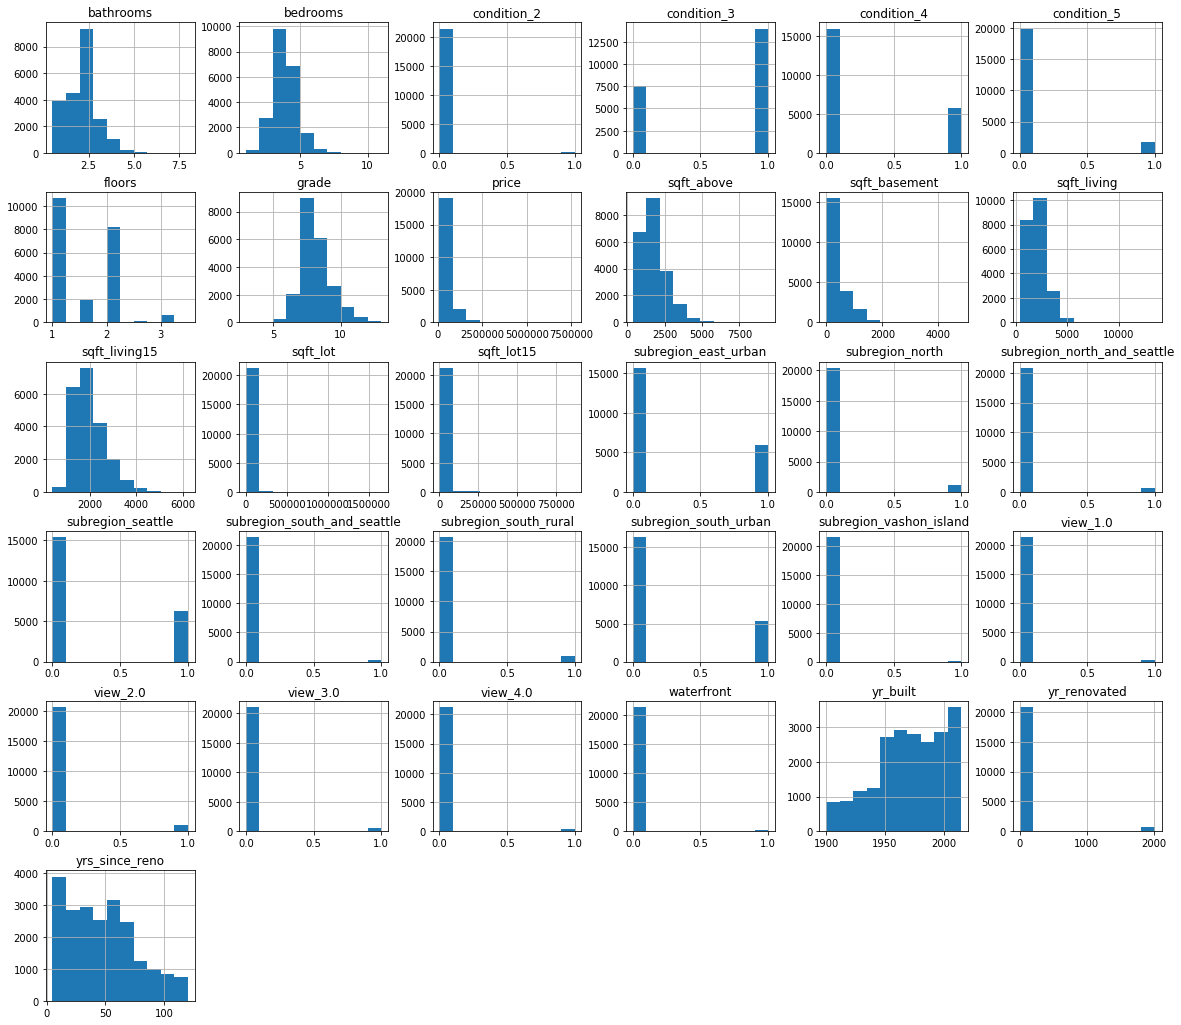

In [49]:
# Histogram of the dataset
df.hist(figsize = (20,18))
plt.savefig('Figures/df_hist.png', dpi=300, bbox_inches='tight');

### Joint plots
Looking at joint plots to see which variables

In [50]:
import scipy.stats as stats

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


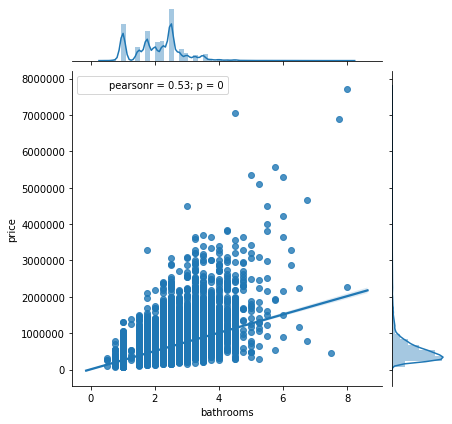

In [51]:
sns.jointplot('bathrooms','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

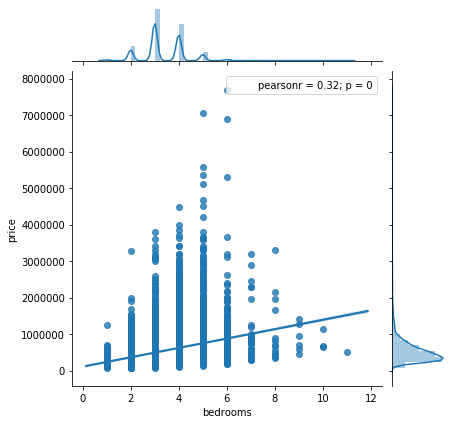

In [52]:
sns.jointplot('bedrooms','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

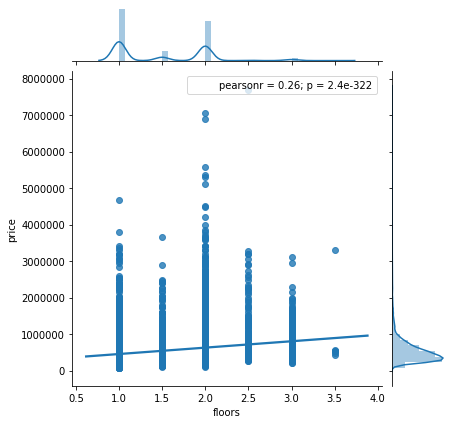

In [53]:
sns.jointplot('floors','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

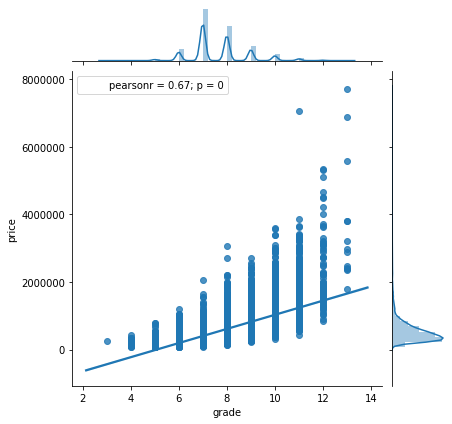

In [54]:
sns.jointplot('grade','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

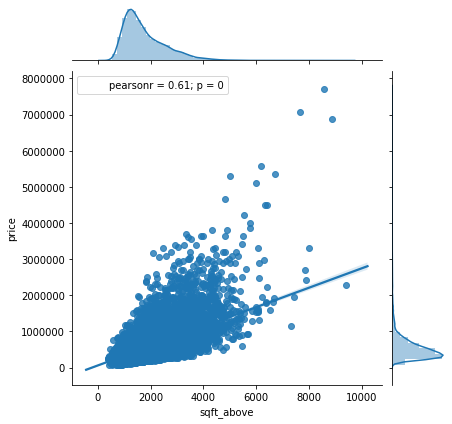

In [55]:
sns.jointplot('sqft_above','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

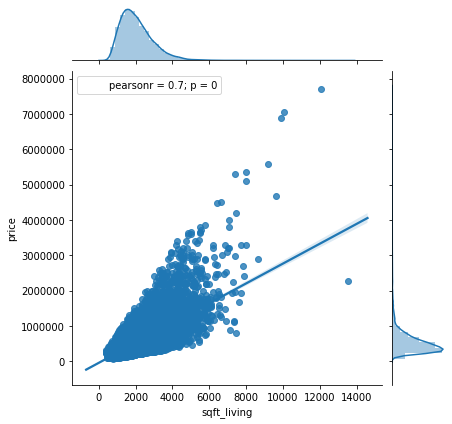

In [56]:
sns.jointplot('sqft_living','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

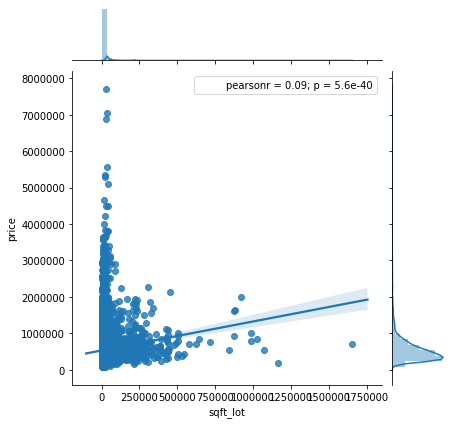

In [57]:
sns.jointplot('sqft_lot','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

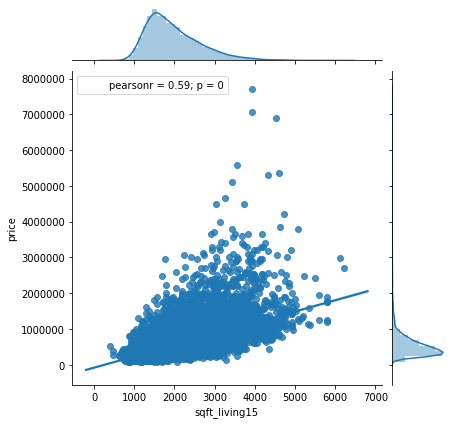

In [58]:
sns.jointplot('sqft_living15','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

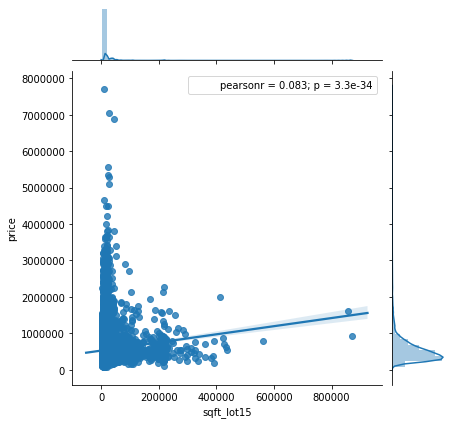

In [59]:
sns.jointplot('sqft_lot15','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

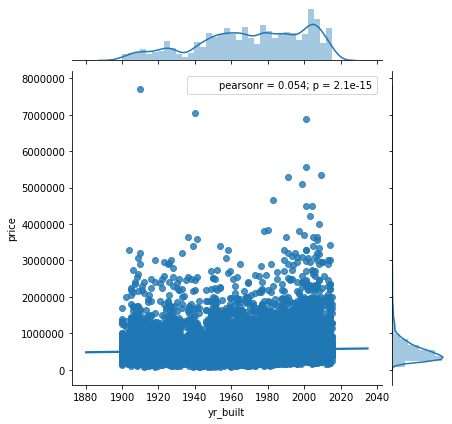

In [60]:
sns.jointplot('yr_built','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

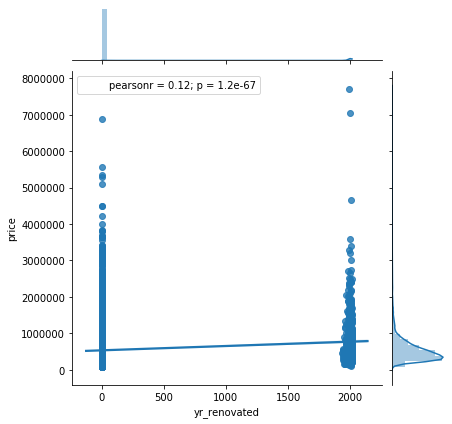

In [61]:
sns.jointplot('yr_renovated','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

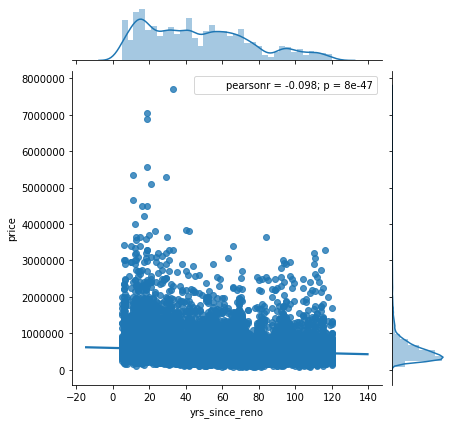

In [62]:
sns.jointplot('yrs_since_reno','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [63]:
# Create a heatmap to see if there is danage of multicorrelation
feats = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
         'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
         'sqft_living15', 'sqft_lot15', 'yrs_since_reno']
corr = df[feats].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,yrs_since_reno
bedrooms,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.366174,0.492543,0.309261,0.160736,0.018626,0.404532,0.031892,-0.169793
bathrooms,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.665834,0.686664,0.283459,0.507166,0.047173,0.569878,0.088297,-0.532382
sqft_living,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.762776,0.876448,0.435152,0.318140,0.051056,0.756400,0.184337,-0.339134
sqft_lot,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.114726,0.184134,0.015424,0.052939,0.004977,0.144756,0.718203,-0.051862
floors,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.458783,0.523970,-0.245694,0.489175,0.003785,0.280072,-0.010734,-0.500702
waterfront,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.082817,0.071776,0.082803,-0.024491,0.073938,0.083822,0.030657,0.006895
grade,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,1.000000,0.756069,0.168240,0.447854,0.015618,0.713863,0.120974,-0.459322
sqft_above,0.492543,0.686664,0.876448,0.184134,0.523970,0.071776,0.756069,1.000000,-0.052130,0.424017,0.020637,0.731756,0.195069,-0.433412
sqft_basement,0.309261,0.283459,0.435152,0.015424,-0.245694,0.082803,0.168240,-0.052130,1.000000,-0.133043,0.067302,0.200478,0.017559,0.107069
yr_built,0.160736,0.507166,0.318140,0.052939,0.489175,-0.024491,0.447854,0.424017,-0.133043,1.000000,-0.202565,0.326353,0.070767,-0.926404


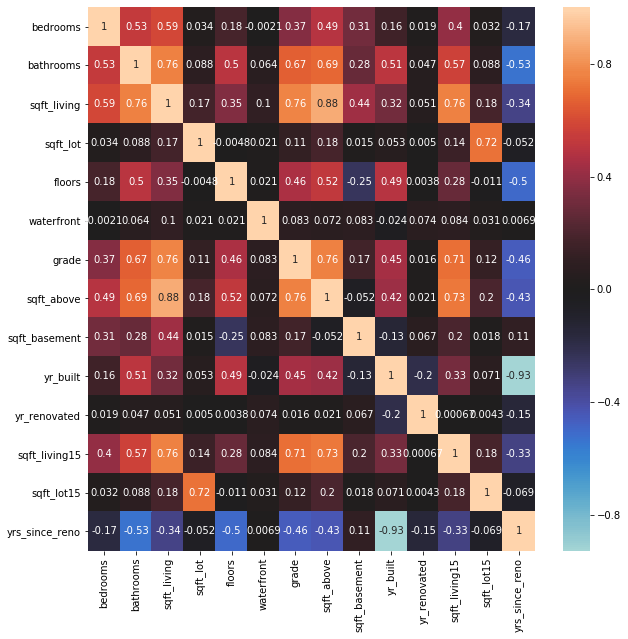

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, center=0, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) ;

### Removing Outliers

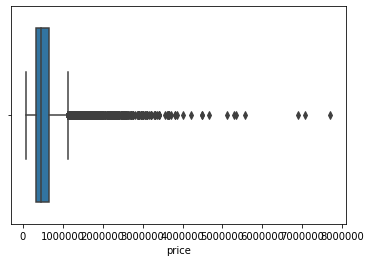

In [65]:
# Create boxplot to see what outliers there may be
sns.boxplot(x=df['price'])

In [66]:
# Find the iqr
from scipy.stats import iqr
data = df['price']
iqr = iqr(data, axis=0)

In [67]:
# define lower outliers
lower_outliers = (df['price'].median() - 1.5 * iqr)
lower_outliers

-34500.0

In [68]:
# define upper outliers
upper_outliers = (df['price'].median() + 1.5 * iqr)
upper_outliers

934500.0

In [69]:
# drop upper outliers, there aren't any lower outliers 
df.drop(df[ df['price'] >= upper_outliers ].index , inplace=True)

count     19758.000000
mean     458327.726086
std      185541.230425
min       78000.000000
25%      310000.000000
50%      429900.000000
75%      580000.000000
max      934000.000000
Name: price, dtype: float64


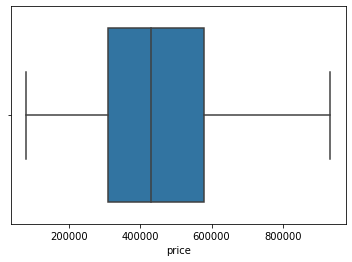

In [70]:
# Take another look at the boxplot and describe
print(df['price'].describe())
sns.boxplot(x=df['price'])

In [71]:
df2 = df.copy()

## Initial Modeling the Data

In [72]:
# Define the problem
outcome = 'price'
x_cols = list(df2.columns)
x_cols.remove(outcome)
x_cols.remove('date')
[x_cols.remove(col) for col in df2.columns if "view" in col]
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15',
 'yrs_since_reno',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'subregion_east_urban',
 'subregion_north',
 'subregion_north_and_seattle',
 'subregion_seattle',
 'subregion_south_and_seattle',
 'subregion_south_rural',
 'subregion_south_urban',
 'subregion_vashon_island']

In [73]:
# Some brief preprocessing
df2.columns = [col.replace(' ', '_') for col in df2.columns]
for col in x_cols:
    df2[col] = (df2[col] - df2[col].mean())/df2[col].std()
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,condition_4,condition_5,subregion_east_urban,subregion_north,subregion_north_and_seattle,subregion_seattle,subregion_south_and_seattle,subregion_south_rural,subregion_south_urban,subregion_vashon_island
0,2014-10-13,221900.0,-0.351980,-1.476456,-1.022612,-0.223466,-0.869532,-0.045039,-0.481355,-0.711585,...,-0.601463,-0.283820,-0.570128,-0.250652,-0.192919,-0.628195,-0.119458,-0.220734,1.663177,-0.075841
1,2014-12-09,538000.0,-0.351980,0.322719,0.862914,-0.182376,0.997071,-0.045039,-0.481355,0.714416,...,-0.601463,-0.283820,-0.570128,-0.250652,-0.192919,1.591781,-0.119458,-0.220734,-0.601228,-0.075841
2,2015-02-25,180000.0,-1.488325,-1.476456,-1.578775,-0.111193,-0.869532,-0.045039,-1.493553,-1.302151,...,-0.601463,-0.283820,-0.570128,3.989397,-0.192919,-0.628195,-0.119458,-0.220734,-0.601228,-0.075841
3,2014-12-09,604000.0,0.784364,1.402224,0.035453,-0.240242,-0.869532,-0.045039,-0.481355,-0.898838,...,-0.601463,3.523182,-0.570128,-0.250652,-0.192919,1.591781,-0.119458,-0.220734,-0.601228,-0.075841
4,2015-02-18,510000.0,-0.351980,-0.037116,-0.344365,-0.160748,-0.869532,-0.045039,0.530843,0.008617,...,-0.601463,-0.283820,1.753904,-0.250652,-0.192919,-0.628195,-0.119458,-0.220734,-0.601228,-0.075841


In [74]:
from statsmodels.formula.api import ols

In [75]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     2168.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:14:32   Log-Likelihood:            -2.5467e+05
No. Observations:               19758   AIC:                         5.094e+05
Df Residuals:                   19732   BIC:                         5.096e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    4.583e+05    682.368    671.672      0.000    4.57e+05     4.6e+05
bedrooms                    -5716.1901    899.939     -6.352      0.000   -7480.147   -3952.233
bathrooms                    1.109e+04   1185.120      9.356      0.000    8764.826    1.34e+04
sqft_living                  3.116e+04    770.674     40.430      0.000    2.96e+04    3.27e+04
sqft_lot                     9872.1679    973.962     10.136      0.000    7963.120    1.18e+04
floors                       3151.3391   1044.387      3.017      0.003    1104.254    5198.425
waterfront                   9574.0693    708.533     13.513      0.000    8185.285     1.1e+04
grade                        5.395e+04   1138.266     47.397      0.000    5.17e+04    5.62e+04
sqft_above                   2.718e+04    794.412     34.218      0.000    2.56e+04    2.87e+04
sqft_basement                1.023e+04    746.718     13.705      0.000    8770.106    1.17e+04
yr_built                    -3.932e+04   4977.492     -7.900      0.000   -4.91e+04   -2.96e+04
yr_renovated                 3070.6745   1759.992      1.745      0.081    -379.057    6520.406
sqft_living15                3.037e+04   1125.053     26.994      0.000    2.82e+04    3.26e+04
sqft_lot15                  -1297.5637    995.035     -1.304      0.192   -3247.917     652.789
yrs_since_reno              -5147.5838   4938.830     -1.042      0.297   -1.48e+04    4532.938
condition_2                  2566.4168   1792.569      1.432      0.152    -947.169    6080.002
condition_3                  3.274e+04   8702.084      3.762      0.000    1.57e+04    4.98e+04
condition_4                  3.977e+04   8060.409      4.934      0.000     2.4e+04    5.56e+04
condition_5                  3.082e+04   4825.810      6.387      0.000    2.14e+04    4.03e+04
subregion_east_urban         4.186e+04   1557.402     26.878      0.000    3.88e+04    4.49e+04
subregion_north              3388.2409   1030.123      3.289      0.001    1369.114    5407.368
subregion_north_and_seattle  5723.0756    931.467      6.144      0.000    3897.322    7548.829
subregion_seattle             5.14e+04   1753.271     29.316      0.000     4.8e+04    5.48e+04
subregion_south_and_seattle -2231.3115    792.615     -2.815      0.005   -3784.904    -677.719
subregion_south_rural       -1.682e+04    953.500    -17.644      0.000   -1.87e+04    -1.5e+04
subregion_south_urban       -4.416e+04   1585.313    -27.853      0.000   -4.73e+04    -4.1e+04
subregion_vashon_island       161.8216    755.445      0.214      0.830   -1318.914    1642.557
==============================================================================
Omnibus:                      994.511   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarqu

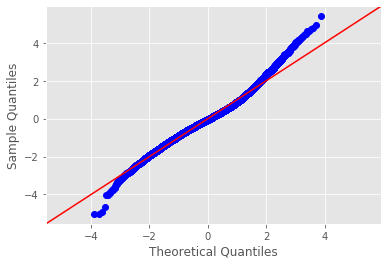

In [76]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
# Run a qq Test
plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

## Model 2

In [77]:
# create a list of all p-values
p_values = model.pvalues

In [78]:
# Create a list of p-values that weren't significant
remove_col = list(p_values[p_values > 0.05].index)

In [79]:
# Check the column that will be removed due to p-values
remove_col

['yr_renovated',
 'sqft_lot15',
 'yrs_since_reno',
 'condition_2',
 'subregion_vashon_island']

In [80]:
# Remove those columns for the seoncd model
x_cols2 = x_cols.copy()
[x_cols2.remove(col) for col in remove_col if col in x_cols2]
x_cols2

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'condition_3',
 'condition_4',
 'condition_5',
 'subregion_east_urban',
 'subregion_north',
 'subregion_north_and_seattle',
 'subregion_seattle',
 'subregion_south_and_seattle',
 'subregion_south_rural',
 'subregion_south_urban']

In [81]:
# Create a heatmap to see if there is danage of multicorrelation so examine
# heat map again to remove any with high correlation
feats = x_cols2.copy()
corr = df[feats].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,...,condition_3,condition_4,condition_5,subregion_east_urban,subregion_north,subregion_north_and_seattle,subregion_seattle,subregion_south_and_seattle,subregion_south_rural,subregion_south_urban
bedrooms,1.000000,0.498361,0.604197,0.023417,0.154123,-0.033767,0.315051,0.475398,0.288109,0.167963,...,0.006296,-0.002717,0.014833,0.154208,0.028341,-0.025545,-0.187670,-0.025935,0.010015,0.046373
bathrooms,0.498361,1.000000,0.706107,0.055663,0.501368,-0.023147,0.599546,0.625924,0.214750,0.556765,...,0.203110,-0.169902,-0.049433,0.201058,0.005060,-0.063854,-0.165640,-0.072936,0.059471,-0.040422
sqft_living,0.604197,0.706107,1.000000,0.151885,0.331289,-0.008918,0.681410,0.845157,0.375713,0.358938,...,0.114319,-0.080545,-0.042889,0.254451,0.031522,-0.049256,-0.245074,-0.057037,0.036911,-0.030457
sqft_lot,0.023417,0.055663,0.151885,1.000000,-0.021578,0.013734,0.083940,0.156707,0.007928,0.037054,...,-0.023334,0.020152,-0.008010,0.022186,0.002105,-0.031712,-0.156364,-0.017826,0.148892,-0.010833
floors,0.154123,0.501368,0.331289,-0.021578,1.000000,-0.014993,0.455392,0.527080,-0.303927,0.519821,...,0.329535,-0.262169,-0.135483,0.056449,-0.049512,-0.042807,0.054324,-0.057756,0.057391,-0.112697
waterfront,-0.033767,-0.023147,-0.008918,0.013734,-0.014993,1.000000,-0.019401,-0.019738,0.017804,-0.037530,...,-0.018882,0.018797,0.000077,-0.025679,-0.011290,-0.008689,-0.025795,0.013740,-0.009942,0.023916
grade,0.315051,0.599546,0.681410,0.083940,0.455392,-0.019401,1.000000,0.688629,0.060563,0.507236,...,0.225655,-0.149648,-0.117901,0.298139,0.010764,-0.037781,-0.145105,-0.087518,-0.004030,-0.110182
sqft_above,0.475398,0.625924,0.845157,0.156707,0.527080,-0.019738,0.688629,1.000000,-0.177822,0.468185,...,0.213278,-0.147814,-0.113409,0.274124,0.016862,-0.064258,-0.324318,-0.057447,0.089519,-0.004266
sqft_basement,0.288109,0.214750,0.375713,0.007928,-0.303927,0.017804,0.060563,-0.177822,1.000000,-0.150914,...,-0.159312,0.107991,0.117667,-0.006819,0.028797,0.020727,0.111109,-0.005406,-0.087252,-0.048677
yr_built,0.167963,0.556765,0.358938,0.037054,0.519821,-0.037530,0.507236,0.468185,-0.150914,1.000000,...,0.382358,-0.255982,-0.232489,0.226028,0.018660,-0.056320,-0.387047,-0.062510,0.129867,0.082654


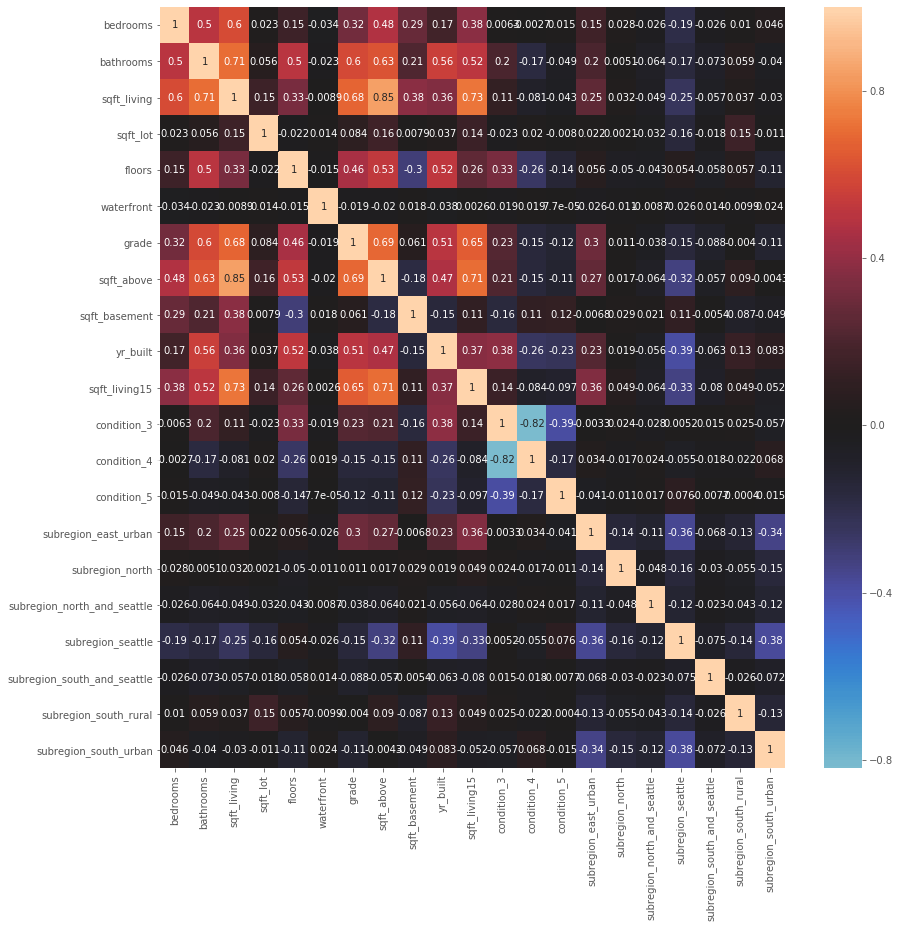

In [82]:
# There is still some high correlation
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, center=0, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) ;

In [83]:
# columns with greater than .65
remove_col2 = ['sqft_above', 'condition_4']

In [84]:
# remove those columns
outcome = 'price'
[x_cols2.remove(col) for col in remove_col2 if col in x_cols2]
x_cols2

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'grade',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'condition_3',
 'condition_5',
 'subregion_east_urban',
 'subregion_north',
 'subregion_north_and_seattle',
 'subregion_seattle',
 'subregion_south_and_seattle',
 'subregion_south_rural',
 'subregion_south_urban']

In [85]:
# Run the second model
predictors = '+'.join(x_cols2)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     2827.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:14:38   Log-Likelihood:            -2.5474e+05
No. Observations:               19758   AIC:                         5.095e+05
Df Residuals:                   19738   BIC:                         5.097e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    4.583e+05    684.601    669.481      0.000    4.57e+05     4.6e+05
bedrooms                    -5738.5282    900.734     -6.371      0.000   -7504.043   -3973.013
bathrooms                    1.218e+04   1178.223     10.336      0.000    9868.949    1.45e+04
sqft_living                  5.996e+04   1558.247     38.482      0.000    5.69e+04     6.3e+04
sqft_lot                     8739.4292    723.922     12.072      0.000    7320.481    1.02e+04
floors                       3427.6881   1044.891      3.280      0.001    1379.613    5475.763
waterfront                   9717.6119    689.586     14.092      0.000    8365.965    1.11e+04
grade                        5.501e+04   1136.436     48.409      0.000    5.28e+04    5.72e+04
sqft_basement               -5193.5303    958.403     -5.419      0.000   -7072.081   -3314.979
yr_built                    -3.631e+04   1097.214    -33.094      0.000   -3.85e+04   -3.42e+04
sqft_living15                2.949e+04   1123.165     26.253      0.000    2.73e+04    3.17e+04
condition_3                 -8403.3182    812.387    -10.344      0.000   -9995.666   -6810.971
condition_5                  7559.1877    752.083     10.051      0.000    6085.041    9033.334
subregion_east_urban         4.209e+04   1495.128     28.154      0.000    3.92e+04     4.5e+04
subregion_north              3461.9402   1001.998      3.455      0.001    1497.940    5425.941
subregion_north_and_seattle  5883.6175    910.898      6.459      0.000    4098.181    7669.053
subregion_seattle            5.103e+04   1681.976     30.341      0.000    4.77e+04    5.43e+04
subregion_south_and_seattle -2351.3465    783.784     -3.000      0.003   -3887.629    -815.064
subregion_south_rural       -1.646e+04    929.414    -17.707      0.000   -1.83e+04   -1.46e+04
subregion_south_urban       -4.398e+04   1515.584    -29.019      0.000    -4.7e+04    -4.1e+04
==============================================================================
Omnibus:                      976.609   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1984.028
Skew:                           0.353   Prob(JB):                         0.00
Kurtosis:                       4.383   Cond. No.                         8.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The likely hood multicollinearity dropped.

### Train Test Split

In [86]:
# Import model validation functions
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [87]:
# Create a training and test set
df_train, df_test = train_test_split(df2,test_size=0.20,shuffle=True,
                                     random_state=420)
df_train.shape, df_test.shape

((15806, 32), (3952, 32))

In [88]:
## Train Model using the training data 
model3 = smf.ols(formula=formula, data=df_train).fit()

In [89]:
# Get Model Predictions and Calculate Training R2
r2_train = r2_score(df_train['price'],model3.predict(df_train))
print(f'Training Data R-Squared = {round(r2_train,3)}')

# Get Model Predictions and Calculate Training R2
r2_test = r2_score(df_test['price'],model3.predict(df_test))
print(f'Training Data R-Squared = {round(r2_test,3)}')

#Display model summary
# model3.summary()

Training Data R-Squared = 0.732
Training Data R-Squared = 0.728


## Interpretations and presentation figures

### Bedrooms and Bathrooms

In [90]:
# Set context to look better on a presentation
sns.set_context("talk")
sns.set_style('dark')

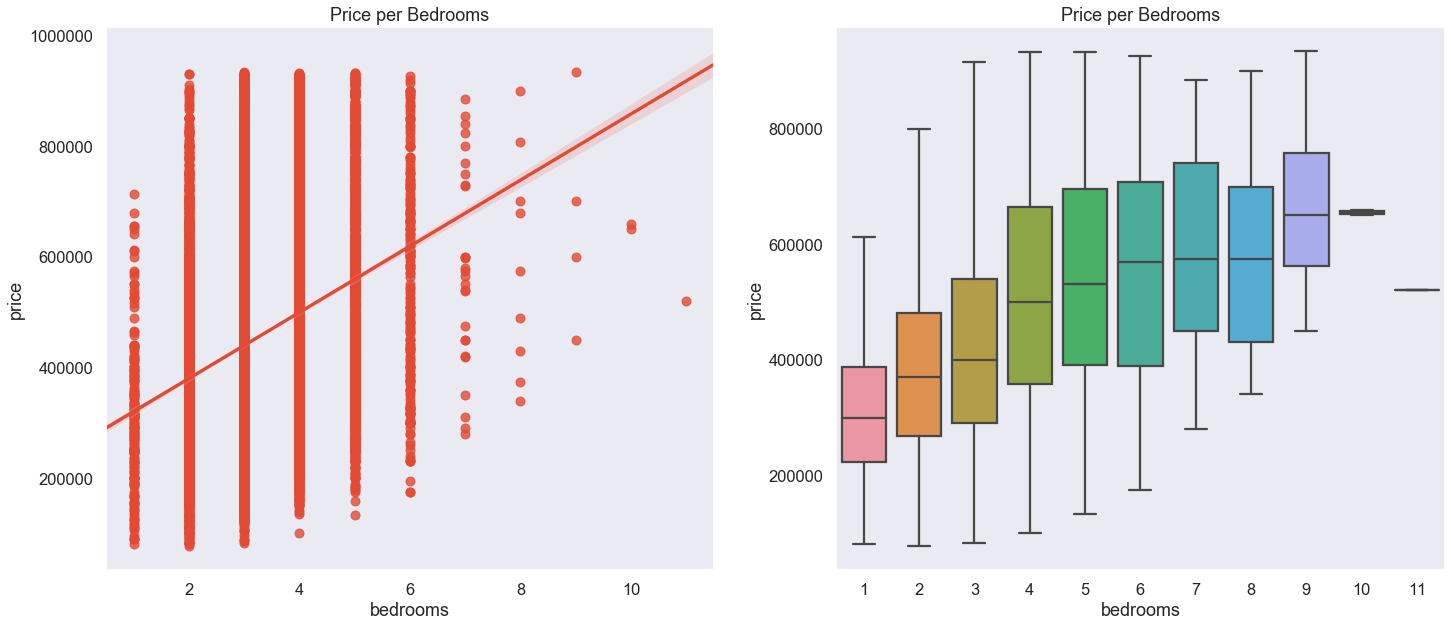

In [91]:
# Graph Price per Bedrooms
fig, axs = plt.subplots(figsize=(24,10), ncols=2)

bed_line = sns.regplot(x=df['bedrooms'], y=df['price'],data=df, ax=axs[0])
bed_line.set_title('Price per Bedrooms')

bed_box = sns.boxplot(x=df['bedrooms'], y=df['price'],data=df, showfliers=False, ax=axs[1])
bed_box.set_title('Price per Bedrooms')

# Save plot as png
plt.savefig('figures/bedrooms_subplots.png', transparent=True);

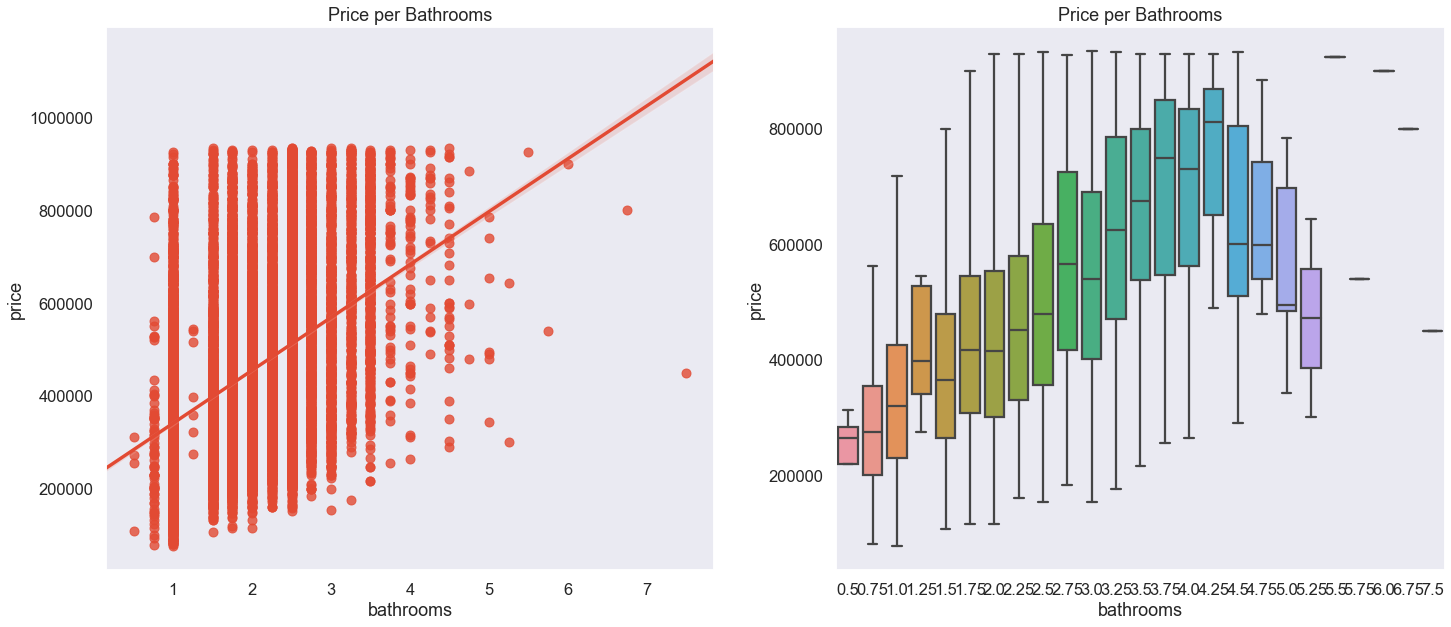

In [92]:
fig, axs = plt.subplots(figsize=(24,10), ncols=2)

bath_line = sns.regplot(x=df['bathrooms'], y=df['price'],data=df, ax=axs[0])
bath_line.set_title('Price per Bathrooms')

bath_box = sns.boxplot(x=df['bathrooms'], y=df['price'],data=df, showfliers=False, ax=axs[1])
bath_box.set_title('Price per Bathrooms')

# Save plot as png
plt.savefig('figures/bathrooms_subplots.png', transparent=True);

#### Interpretation:
- In general, number of bathrooms and bedrooms relate to price of house.
- More bedrooms and bathrooms, the more the house goes for.

### Grade

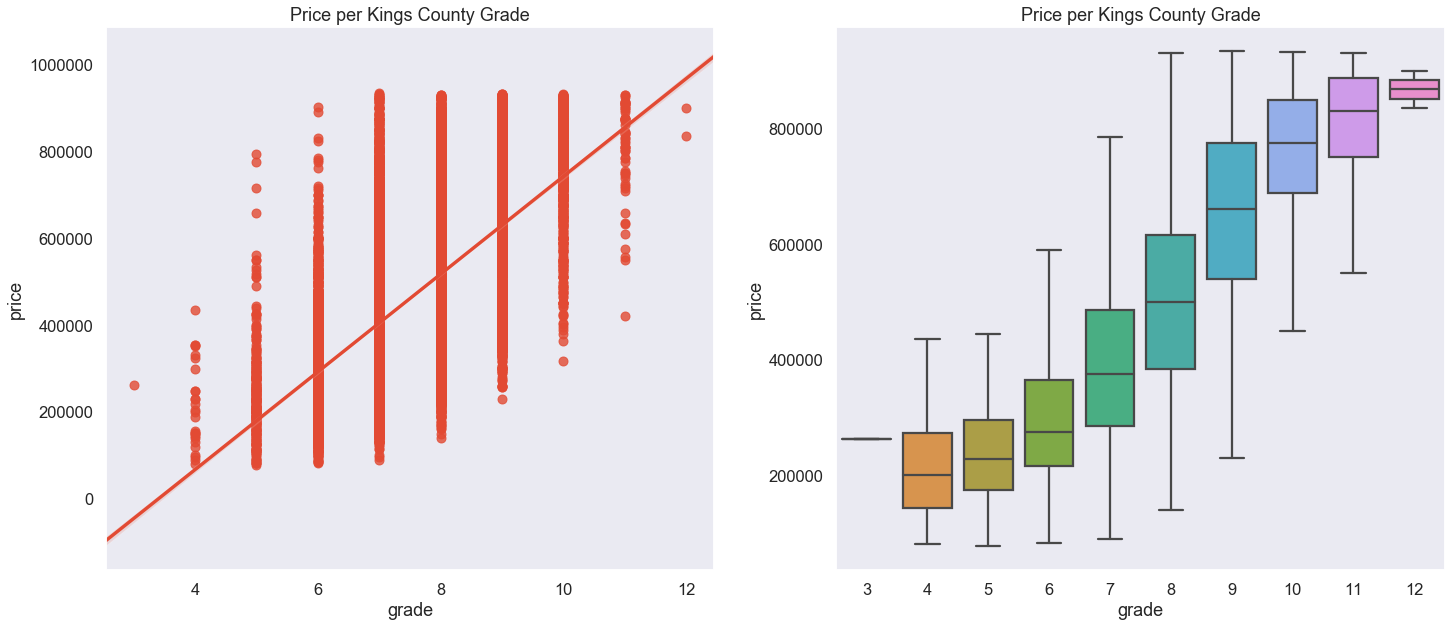

In [93]:
fig, axs = plt.subplots(figsize=(24,10), ncols=2)

grade_line = sns.regplot(x=df['grade'], y=df['price'],data=df, ax=axs[0])
grade_line.set_title('Price per Kings County Grade')

grade_box = sns.boxplot(x=df['grade'], y=df['price'],data=df, showfliers=False, ax=axs[1])
grade_box.set_title('Price per Kings County Grade')

# Save plot as png
plt.savefig('figures/grade_subplots.png', transparent=True);

#### Interpretation
- The higher the grade, the high the sales price.

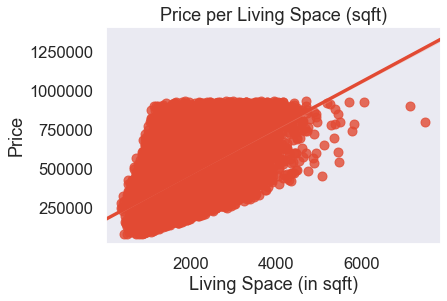

In [94]:
sqft_line = sns.regplot(x=df['sqft_living'], y=df['price'],data=df)
sqft_line.set_title('Price per Living Space (sqft)')
sqft_line.set_xlabel('Living Space (in sqft)')
sqft_line.set_ylabel('Price')


# Save plot as png
plt.savefig('figures/sqft_living_subplots.png', transparent=True);

### Subregion Boxplot

In [95]:
# Create subregion list
subregion_list = []
for x in df.columns:
    if 'subregion' in x:
        subregion_list.append(x)

In [96]:
subregion_list

['subregion_east_urban',
 'subregion_north',
 'subregion_north_and_seattle',
 'subregion_seattle',
 'subregion_south_and_seattle',
 'subregion_south_rural',
 'subregion_south_urban',
 'subregion_vashon_island']

In [97]:
# Def to create a column with subregions for boxplot
def get_region(row):
    for c in subregion_list:
        if row[c]==1:
            return c

In [98]:
df['region'] = df.apply(get_region, axis=1)

In [99]:
# Create dict of subregions and price
region_dict = {}
for x in subregion_list:

    try:
        temp = df.groupby(x).get_group(True)['price']
        region_dict[x] = temp.reset_index()
    except:
        print(x)
# region_dict

In [100]:
# Create Dictionary without a Dataframe in it
region_dict2 = {}
for x in subregion_list:
    region_dict2[x] = region_dict[x]['price']
# region_dict2['subregion_east_urban']

In [101]:
# Create a DataFrame of subregions and price for a boxplot
df_region = pd.DataFrame.from_dict(region_dict2)
df_region.head()

,subregion_east_urban,subregion_north,subregion_north_and_seattle,subregion_seattle,subregion_south_and_seattle,subregion_south_rural,subregion_south_urban,subregion_vashon_island
0,510000.0,180000.0,385000.0,538000.0,229500.0,323000.0,221900.0,369900.0
1,662500.0,310000.0,280000.0,604000.0,255000.0,360000.0,257500.0,309600.0
2,400000.0,452000.0,410000.0,468000.0,445838.0,720000.0,291850.0,517534.0
3,719000.0,230000.0,660000.0,530000.0,390000.0,390000.0,189000.0,705000.0
4,580500.0,527000.0,420000.0,650000.0,232000.0,360000.0,230000.0,290000.0


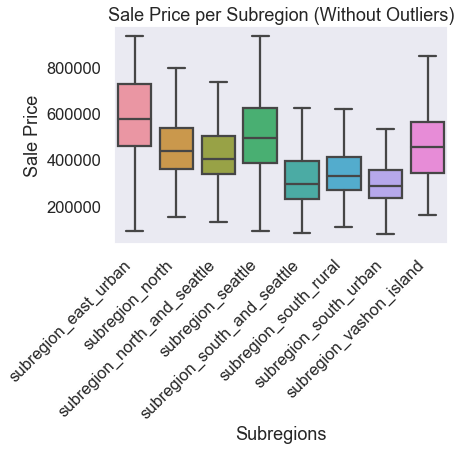

In [102]:
region_box = sns.boxplot(data=df_region, showfliers=False)
region_box.set_xticklabels(subregion_list, rotation=45, ha='right')
region_box.set_title('Sale Price per Subregion (Without Outliers)')
region_box.set_xticklabels(df_region, rotation=45, ha='right')
region_box.set_ylabel('Sale Price')
region_box.set_xlabel('Subregions')
bottom, top = region_box.get_ylim()
region_box.set_ylim(bottom + 1.5, top - 0.5) 

# Save plot as png
plt.savefig('figures/subregion_boxwhisker.png', transparent=True);

### Things not important

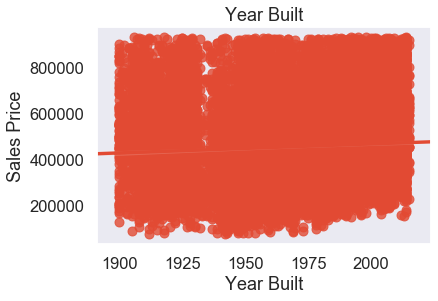

In [103]:
yr_built = sns.regplot(x=df['yr_built'], y=df['price'])
yr_built.set_title('Year Built')
yr_built.set_ylabel('Sales Price')
yr_built.set_xlabel('Year Built')

# Save plot as png
plt.savefig('figures/yr_built.png', transparent=True);

### Overall Recommendations:
- Year built has little relationship with price
- Number of bathroom and bedrooms have a greater relationship with price
- The living area square feet relates to sales price positively
- Subregion: where the house is located can effect the sale price
- King County Grade is a god predictor of the sales price. 
- If you want to increase sales price focus on increasing King County Grade(high end finishes, custom designs, high quality material used), increasing living square feet by adding bedrooms and/or bathrooms  